#  THIS CODE DOCUMENT IS FOR MY MASTERS THESIS " 
Machine Learning in Football prediction for the Begian Jupiler League

In [9]:
# Importing usefull packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:

# Reading the datasets (assuming they are CSV files)

B1920 = pd.read_csv('B1920.csv')
B2021 = pd.read_csv('B2021.csv')
B2122 = pd.read_csv('B2122.csv')
B2223 = pd.read_csv('B2223.csv')
B2324 = pd.read_csv('B2324.csv')



In [11]:

print(f'2019/2020 season shape: {B1920.shape}')
print(f'2020/2021 season shape: {B2021.shape}')
print(f'2021/2022 season shape: {B2122.shape}')
print(f'2022/2023 season shape: {B2223.shape}')
print(f'2023/2024 season shape: {B2324.shape}')

2019/2020 season shape: (232, 105)
2020/2021 season shape: (306, 105)
2021/2022 season shape: (306, 106)
2022/2023 season shape: (306, 105)
2023/2024 season shape: (312, 105)


the data retrived from football.co.uk shows dissimilarities  accross the different years considered on the total number of matches played. 
-2018/2019 season had 240 games played 
-2019/2020 season had  232 games played
-2020/2021, 2021/2022, 2022/2023 all had 306 games played.
-2023/2024 season had 312 games played

**The differene in total number of games will be invegated and if need be will be adjusted.**

# Merging  datasets
 the 6 season datasets is combined into on main dataset  for further analyis and exploration.

In [13]:
# List of DataFrames
dfs = [ B1920, B2021, B2122, B2223, B2324]

# Concatenate the DataFrames vertically (one below the other)
merged_data = pd.concat(dfs, ignore_index=True)


# Display the merged dataset
merged_data.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,Unnamed: 105
0,B1,26/07/2019,19:30,Genk,Kortrijk,2,1,H,0.0,1.0,...,-1.25,1.98,1.88,2.01,1.88,2.05,1.96,1.96,1.87,NaN
1,B1,27/07/2019,17:00,Cercle Brugge,Standard,0,2,A,0.0,0.0,...,0.50,1.88,1.98,1.91,1.99,1.95,2.02,1.89,1.94,NaN
2,B1,27/07/2019,19:00,St Truiden,Mouscron,0,1,A,0.0,1.0,...,-0.25,1.83,2.02,1.87,2.03,1.88,2.07,1.83,2.02,NaN
3,B1,27/07/2019,19:00,Waregem,Mechelen,0,2,A,0.0,1.0,...,0.25,1.72,2.07,1.75,2.17,1.80,2.28,1.72,2.15,NaN
4,B1,27/07/2019,19:30,Waasland-Beveren,Club Brugge,1,3,A,1.0,1.0,...,1.50,2.20,1.70,2.19,1.74,2.25,1.83,2.11,1.74,NaN


In [29]:
merged_data.shape

(1462, 106)

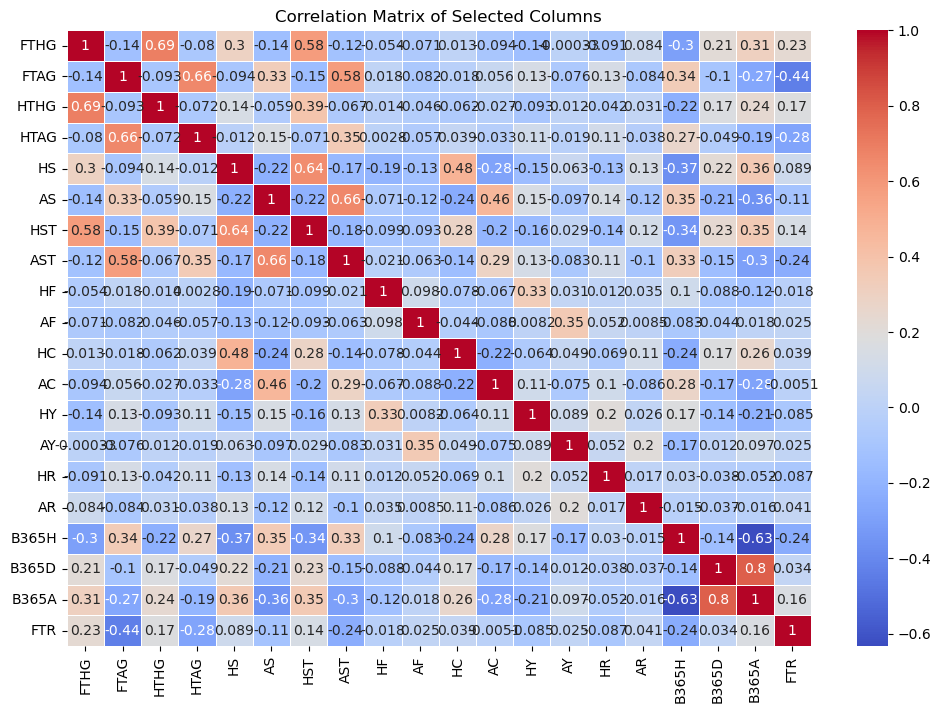

In [23]:


# Assuming 'merged_data' is the merged DataFrame

# Specify the columns to use for the correlation plot
columns = ['FTHG', 'FTAG', 
           'HTHG', 'HTAG', 
           'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 
           'HC', 'AC', 'HY', 'AY', 'HR', 'AR', 
           'B365H', 'B365D', 'B365A','FTR']

# Filter the merged DataFrame to include only the specified columns
filtered_data = merged_data[columns]

# Calculate the correlation matrix
corr_matrix = filtered_data.corr()

# Create a correlation heatmap
plt.figure(figsize=(12, 8))  # Set the figure size
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Show the plot
plt.title('Correlation Matrix of Selected Columns')
plt.show()


In [15]:
# Count the occurrences of each category in the FTR column
ftr_counts = merged_data['FTR'].value_counts()

# Display the different categories and their counts
print(ftr_counts)


FTR
H    637
A    487
D    338
Name: count, dtype: int64


C:\Users\P52\AppData\Local\Temp\ipykernel_13864\2277699466.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=merged_data, x='FTR', order=ftr_counts.index, palette='viridis')


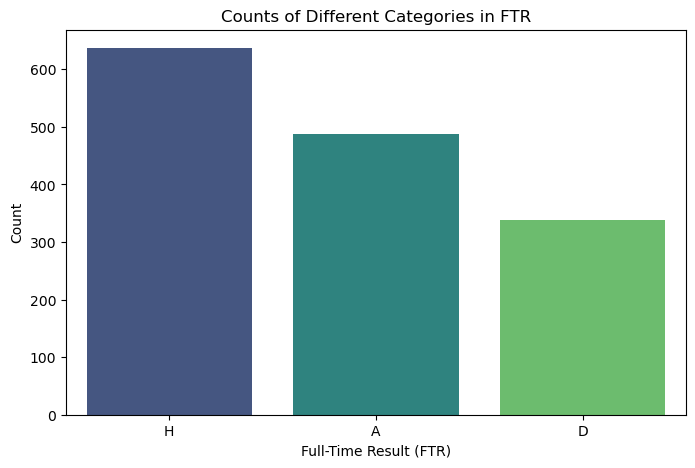

In [16]:
# Plot the counts of different categories in FTR
plt.figure(figsize=(8, 5))  # Set the figure size
sns.countplot(data=merged_data, x='FTR', order=ftr_counts.index, palette='viridis')

# Show the plot
plt.title('Counts of Different Categories in FTR')
plt.xlabel('Full-Time Result (FTR)')
plt.ylabel('Count')
plt.show()


In [17]:
# Calculate the counts of each category in the FTR column
ftr_counts = merged_data['FTR'].value_counts()

# Calculate the percentage for each category
ftr_percentage = (ftr_counts / len(merged_data)) * 100

# Display the percentages
print(ftr_percentage)


FTR
H    43.570451
A    33.310534
D    23.119015
Name: count, dtype: float64


C:\Users\P52\AppData\Local\Temp\ipykernel_13864\143521021.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ftr_percentage.index, y=ftr_percentage.values, palette='viridis')


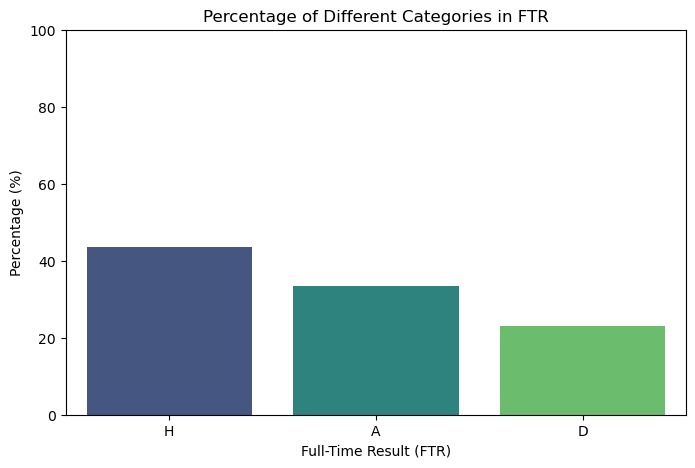

In [18]:
# Plot the percentages of different categories in FTR
plt.figure(figsize=(8, 5))  # Set the figure size
sns.barplot(x=ftr_percentage.index, y=ftr_percentage.values, palette='viridis')

# Show the plot
plt.title('Percentage of Different Categories in FTR')
plt.xlabel('Full-Time Result (FTR)')
plt.ylabel('Percentage (%)')
plt.ylim(0, 100)  # Set y-axis limit to 100%
plt.show()


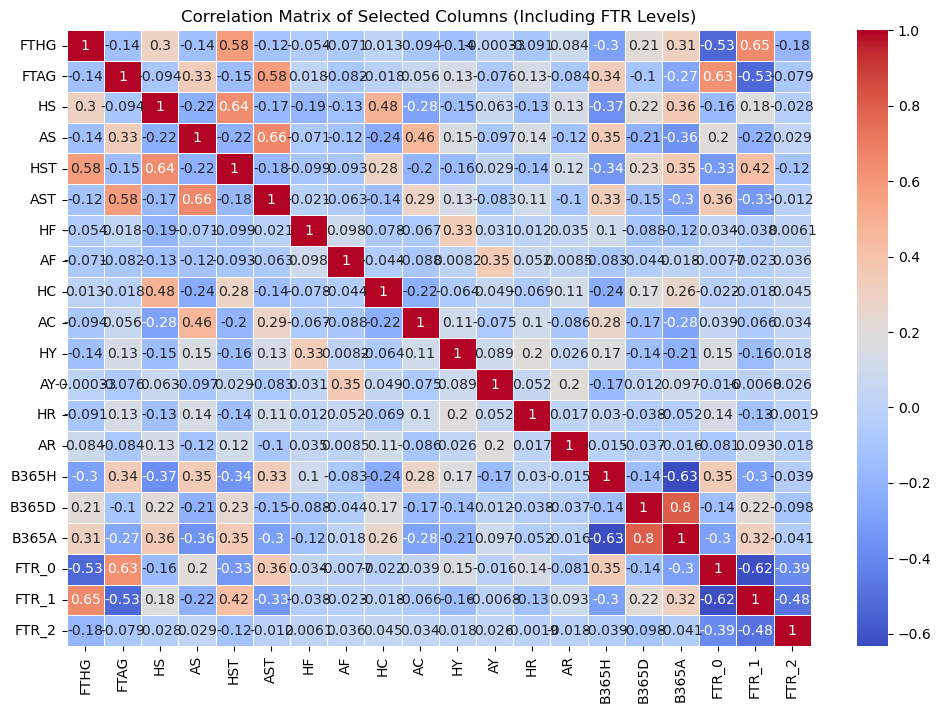

In [21]:


# Assuming 'merged_data' is the merged DataFrame and 'FTR' has been converted to numeric values

# Create dummy variables for FTR
ftr_dummies = pd.get_dummies(merged_data['FTR'], prefix='FTR', drop_first=False)

# Combine the dummy variables with the original merged data
merged_data_with_dummies = pd.concat([merged_data, ftr_dummies], axis=1)

# Specify the columns to use for the correlation plot, including dummy variables for FTR
columns = ['FTHG', 'FTAG', 
           'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 
           'HC', 'AC', 'HY', 'AY', 'HR', 'AR', 
           'B365H', 'B365D', 'B365A', 'FTR_0', 'FTR_1', 'FTR_2']

# Filter the merged DataFrame to include only the specified columns
filtered_data = merged_data_with_dummies[columns]

# Calculate the correlation matrix
corr_matrix = filtered_data.corr()

# Create a correlation heatmap
plt.figure(figsize=(12, 8))  # Set the figure size
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Show the plot
plt.title('Correlation Matrix of Selected Columns (Including FTR Levels)')
plt.show()


In [30]:
merged_data.shape

(1462, 106)

In [31]:




# Assuming 'merged_data' is your original DataFrame

# Select the first 26 columns from merged_data
new_data = merged_data.iloc[:, :26]

# Save the new DataFrame to a CSV file
new_data.to_csv('filtered_merged_data.csv', index=False)

print("New dataset saved as 'filtered_merged_data.csv'.")


New dataset saved as 'filtered_merged_data.csv'.


In [33]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Div       1462 non-null   object 
 1   Date      1462 non-null   object 
 2   Time      1462 non-null   object 
 3   HomeTeam  1462 non-null   object 
 4   AwayTeam  1462 non-null   object 
 5   FTHG      1462 non-null   int64  
 6   FTAG      1462 non-null   int64  
 7   FTR       1462 non-null   int64  
 8   HTHG      1458 non-null   float64
 9   HTAG      1458 non-null   float64
 10  HTR       1458 non-null   object 
 11  HS        1457 non-null   float64
 12  AS        1457 non-null   float64
 13  HST       1457 non-null   float64
 14  AST       1457 non-null   float64
 15  HF        1457 non-null   float64
 16  AF        1457 non-null   float64
 17  HC        1457 non-null   float64
 18  AC        1457 non-null   float64
 19  HY        1458 non-null   float64
 20  AY        1458 non-null   floa

In [34]:
new_data.describe()

,FTHG,FTAG,FTR,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A
count,1462.000000,1462.000000,1462.000000,1458.000000,1458.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1458.000000,1458.000000,1458.000000,1458.000000,1461.000000,1461.000000,1461.000000
mean,1.594391,1.331053,0.898085,0.704390,0.576132,13.171585,11.108442,4.902539,4.170899,11.700069,12.494166,5.459849,4.501030,1.776406,2.138546,0.098765,0.133059,2.579781,3.936496,3.897659
std,1.315020,1.183901,0.744505,0.844698,0.747473,5.226274,4.634058,2.496723,2.347322,3.846106,3.919538,2.812587,2.569133,1.316468,1.391220,0.320622,0.353613,1.338543,0.754615,2.507616
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.080000,3.000000,1.160000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,10.000000,8.000000,3.000000,2.000000,9.000000,10.000000,4.000000,3.000000,1.000000,1.000000,0.000000,0.000000,1.660000,3.500000,2.200000
50%,1.000000,1.000000,1.000000,1.000000,0.000000,12.000000,11.000000,5.000000,4.000000,11.000000,12.000000,5.000000,4.000000,2.000000,2.000000,0.000000,0.000000,2.150000,3.750000,3.100000
75%,2.000000,2.000000,1.000000,1.000000,1.000000,17.000000,14.000000,6.000000,6.000000,14.000000,15.000000,7.000000,6.000000,3.000000,3.000000,0.000000,0.000000,3.100000,4.000000,4.750000
max,7.000000,7.000000,2.000000,5.000000,4.000000,33.000000,29.000000,16.000000,22.000000,25.000000,26.000000,21.000000,16.000000,8.000000,7.000000,2.000000,2.000000,13.000000,10.000000,23.000000


In [35]:
new_data.shape

(1462, 26)

# Missing data  Summary

In [32]:
# Assuming 'merged_data' is your merged DataFrame

# Get the number of missing values for each variable
missing_values =new_data.isnull().sum()

# Filter to show only columns with missing values
missing_values = missing_values[missing_values > 0]

# Display the missing values
print("Missing values for each variable:")
print(missing_values)


Missing values for each variable:
HTHG     4
HTAG     4
HTR      4
HS       5
AS       5
HST      5
AST      5
HF       5
AF       5
HC       5
AC       5
HY       4
AY       4
HR       4
AR       4
B365H    1
B365D    1
B365A    1
dtype: int64


In [36]:


# Assuming 'new_data' is the DataFrame created from the specified columns

# Get the rows with missing values and create a new DataFrame
rows_with_missing_values = new_data[new_data.isnull().any(axis=1)]

# Display the DataFrame with rows containing missing values
missing_values_df = pd.DataFrame(rows_with_missing_values)

# Print the DataFrame
print("DataFrame containing rows with missing values:")
print(missing_values_df)


DataFrame containing rows with missing values:
    Div        Date   Time             HomeTeam       AwayTeam  FTHG  FTAG  \
546  B1  27/07/2021  17:30         Beerschot VA  Cercle Brugge     0     1   
726  B1  15/01/2022  15:15  Oud-Heverlee Leuven       Mechelen     5     0   
803  B1  06/03/2022  12:30              Antwerp   Beerschot VA     2     1   
842  B1  10/04/2022  17:30         St. Gilloise   Beerschot VA     5     0   
968  B1  23/10/2022  17:30             Standard     Anderlecht     5     0   
992  B1  12/11/2022  19:45            Charleroi       Mechelen     0     5   

     FTR  HTHG  HTAG  ...    AF   HC   AC   HY   AY   HR   AR  B365H  B365D  \
546    0   0.0   1.0  ...   NaN  NaN  NaN  1.0  1.0  0.0  0.0   2.20    3.6   
726    1   NaN   NaN  ...   NaN  NaN  NaN  NaN  NaN  NaN  NaN   2.10    3.6   
803    1   0.0   1.0  ...  13.0  7.0  3.0  2.0  7.0  0.0  1.0    NaN    NaN   
842    1   NaN   NaN  ...   NaN  NaN  NaN  NaN  NaN  NaN  NaN   1.14    7.5   
968    1   